Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

Load the data

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Scale the images

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


CNN Model

In [ ]:
model = Sequential()
#Block1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
#Block2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
#Block3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
#Flatten
model.add(Flatten())
#Dense Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
#Output Layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403,850 (1.54 MB)

 Trainable params: 403,850 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Model Compile

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [ ]:
hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=256)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5567 - loss: 1.1757 - val_accuracy: 0.8026 - val_loss: 0.5353
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7992 - loss: 0.5527 - val_accuracy: 0.8346 - val_loss: 0.4464
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8315 - loss: 0.4637 - val_accuracy: 0.8463 - val_loss: 0.4086
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8469 - loss: 0.4197 - val_accuracy: 0.8607 - val_loss: 0.3715
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8587 - loss: 0.3840 - val_accuracy: 0.8731 - val_loss: 0.3486
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8667 - loss: 0.3638 - val_accuracy: 0.8730 - val_loss: 0.3411
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8753 - loss: 0.3400 - val_accuracy: 0.8774 - val_loss: 0.3306
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8771 - loss: 0.3302 - val_acc

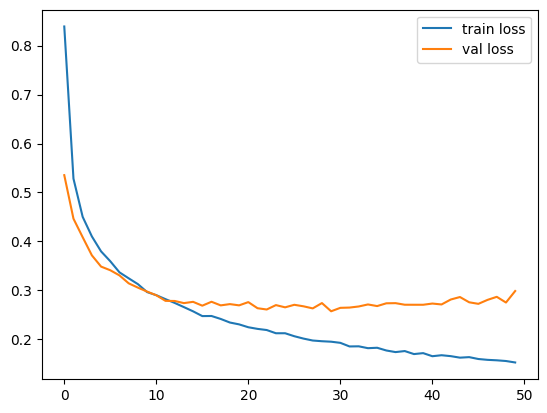

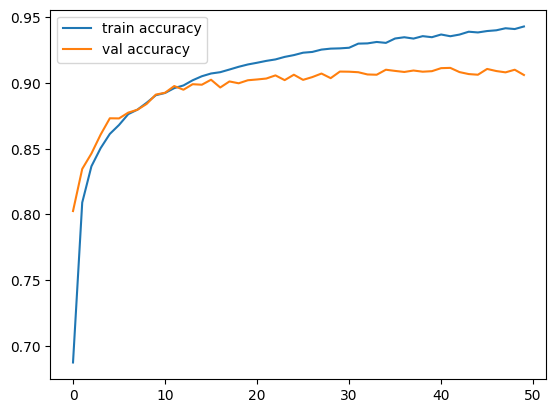

In [ ]:
# Plot the training and validation loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

Model Evaluation

Train Predictions

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_train = np.argmax(y_pred_train, axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


Test Predictions

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def model_eval(actual, predicted):
  print(classification_report(actual, predicted))
  print(confusion_matrix(actual, predicted))
  print(accuracy_score(actual, predicted))

In [ ]:
model_eval(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6000
           1       1.00      1.00      1.00      6000
           2       0.90      0.98      0.94      6000
           3       0.97      0.99      0.98      6000
           4       0.97      0.91      0.94      6000
           5       1.00      1.00      1.00      6000
           6       0.94      0.89      0.91      6000
           7       0.99      0.99      0.99      6000
           8       1.00      1.00      1.00      6000
           9       0.99      0.99      0.99      6000

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

[[5796    0   50   32    0    0  122    0    0    0]
 [   0 5995    0    3    0    0    1    0    1    0]
 [  38    0 5869   12   33    0   48    0    0    0]
 [  13    1   16 5929   32    0    9    0    0    0]
 [   2    2  284   60 5485   

In [ ]:
model_eval(y_test, y_pred_test)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.79      0.92      0.85      1000
           3       0.91      0.92      0.91      1000
           4       0.88      0.81      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.69      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[862   1  32  15   2   1  77   0  10   0]
 [  3 978   1  13   3   0   1   0   1   0]
 [ 12   0 917   9  26   0  32   0   4   0]
 [ 14   4  25 917  17   0  22   0   1   0]
 [  2   0  89  24 807   0  75   0   3   0]
 [  1   0   0   1   0 977 